In [325]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import os
import importlib
import pickle

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results/'

In [316]:
GHz = 1e9
nmax_r =5
nmax_f =15

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [126]:
experiment_name = 'qubit_1_single_1'
load = False
method = 'Nelder-Mead'
# method = 'SLSQP'
# method = 'L-BFGS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [127]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [128]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [129]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

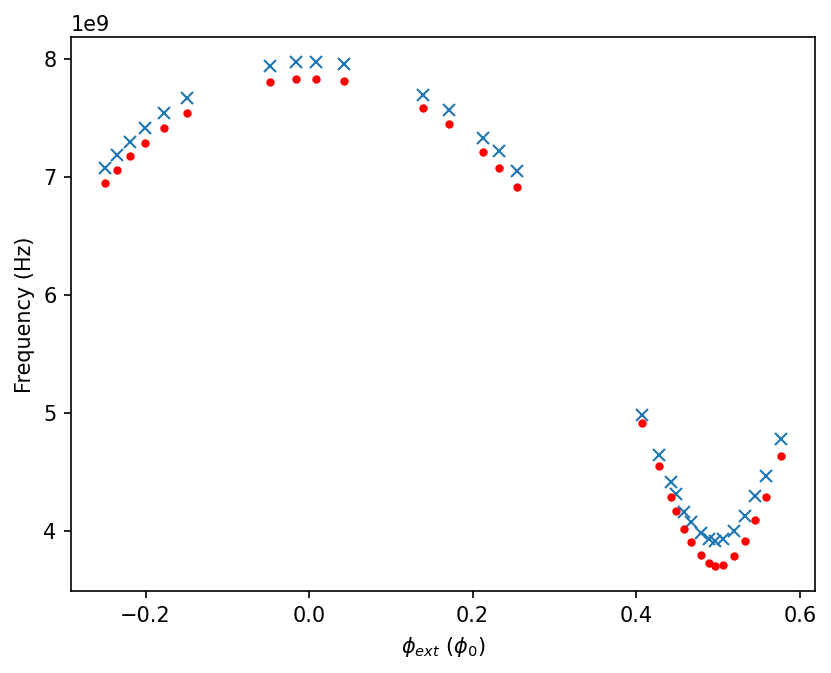

In [130]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [131]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.7186395090895304
2.5341186942126392
2.537184886306335
1.010415907060325
1.7483982509743348
2.9536784171512878
5.207291279899645
1.4513761089351076
0.27016861950071275
0.35255283368514373
0.5875429987284773
1.8915642811724962
0.8641873769933061
1.598848132345206
0.7273706359398432
0.2747830630641104
0.15479551703443817
0.5437916457801215
0.3714409759418272
1.0131343533724246
0.28251827150241393
0.3872023335302289
0.18843127250569644
0.7245695134407464
0.16469521926273523
0.13603754449739797
0.30595050795162115
0.08087207946271263
0.23710888516455186
0.07526592182113247
0.3055495973630536
0.1793826293360587
0.08089911798769694
0.2777390725292358
0.07054481178838319
0.14627433964140085
0.07144375310862007
0.0967702238315949
0.04991826637933293
0.039251679728237655
0.08554080729523346
0.11937021339476458
0.04278924755550563
0.09564558544113728
0.042308511551922036
0.08243924065014414
0.04220994229428724
0.06279903718067945
0.0387463490017481
0.05434460000645683
0.035886259533082436
0.038

In [132]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 2.6900e+01
LF_1 = 2.6500e+01
EJ_1 = 5.4000e+00
I0 = 3.1700e-03
I_origin = -1.9350e-03


Optimized parameters 

CF_1 = 2.4377e+01
LF_1 = 2.7736e+01
EJ_1 = 5.0515e+00
I0 = 3.1627e-03
I_origin = -1.9372e-03


### Plot fits and errors

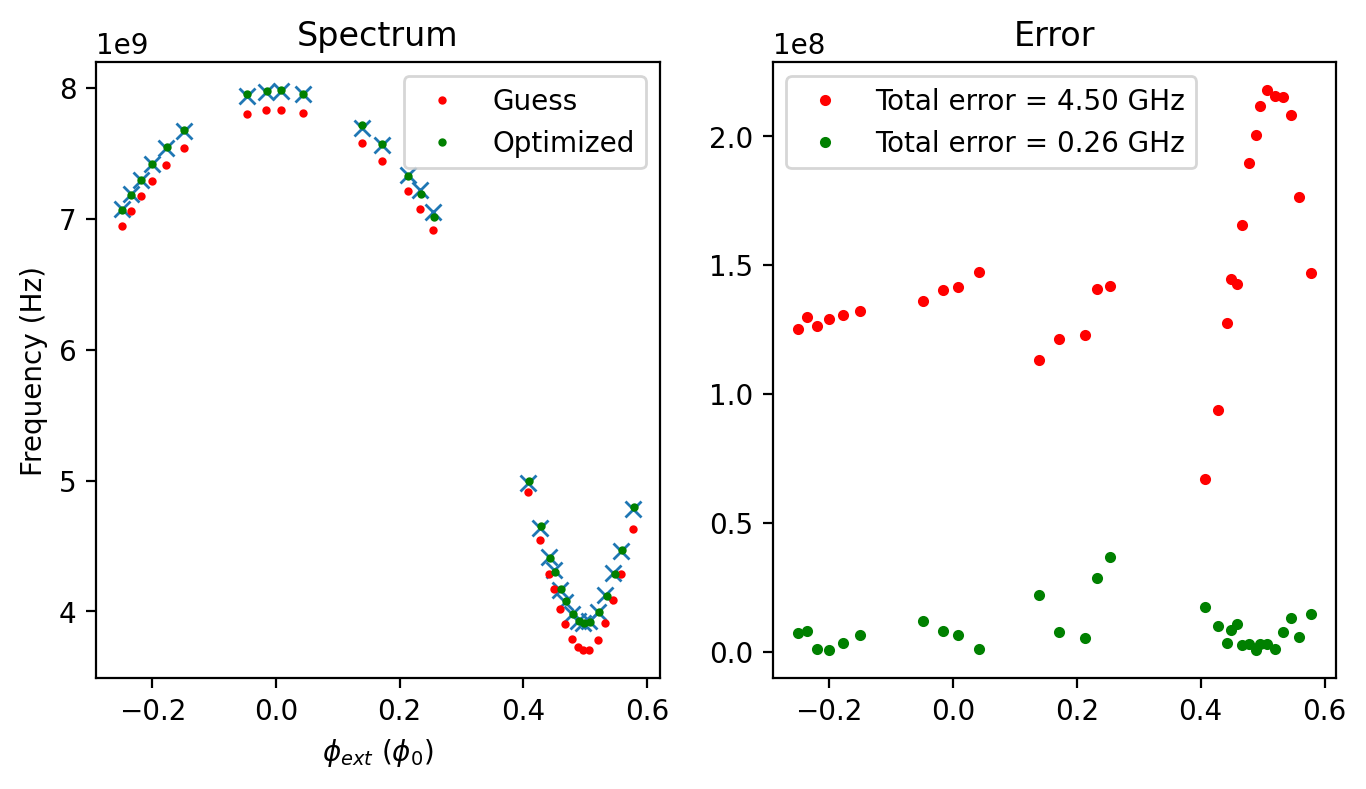

In [133]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [150]:
experiment_name = 'resonator_1_single_1'
load = False
# method = 'Nelder-Mead'
method = 'SLSQP'


### Load spectral data and theoretical model

In [151]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [152]:
CF_1, LF_1, EJ_1, I0_guess, I_origin_guess = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']

Δ = 1
LR = 95.1
CR = 6.07
crossing_index_1 = 11
crossing_index_2 = 10
nmax_r=5
nmax_f=15

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, nmax_r, nmax_f ])
parameters_guess = [CR, LR, Δ, I0_guess, I_origin_guess]

parameter_names = ['CR_1', 'LR_1', 'Delta', 'I0', 'I_origin']
bounds = ((2,25), (30,170), (0,2), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

### Plot guess to check

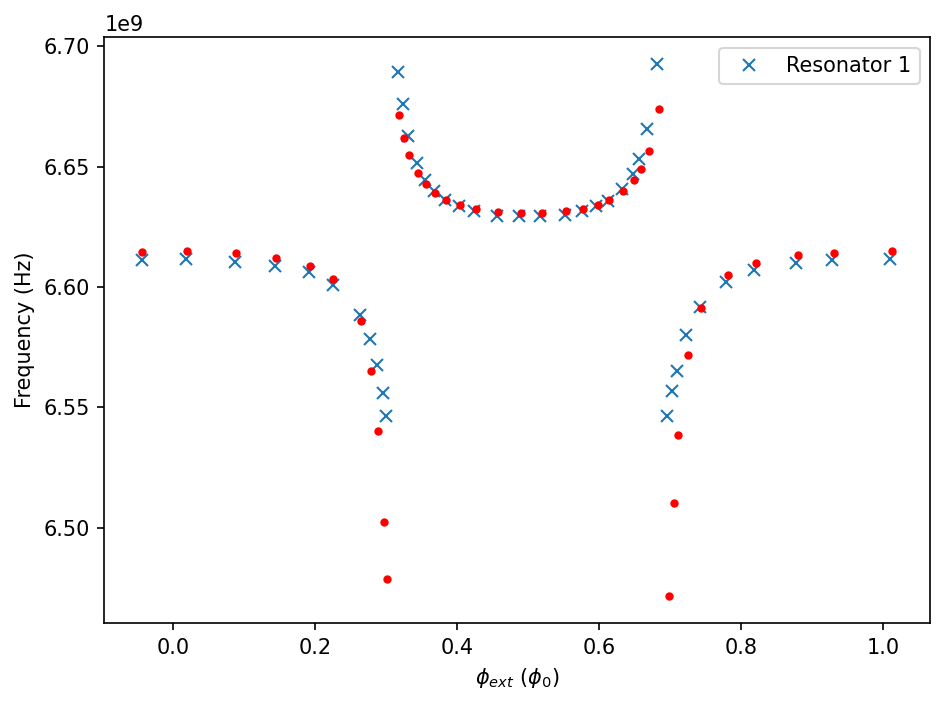

In [153]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [154]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.01813739851229549
0.018137401618470828
0.01813739870577978
0.01813739942036867
0.0181408579740122
0.018137288121940584
0.602109861558575
0.01307056445373504
0.013070560121717001
0.013070564175044751
0.013070565054224322
0.013073898548555764
0.013073099343396363
10.76562219564355
0.03268646402274584
0.012452340123064017
0.012452335457197842
0.012452339823363886
0.01245234068701666
0.0124536429307754
0.012451127161533317
1.814586384893146
0.013132376897840775
0.007276267691804631
0.007276269542360179
0.0072762678082297005
0.0072762680348280005
0.0072773573058628905
0.007274774427038078
0.08800541087357527
0.007749279232793449
0.004488230923164958
0.004488230444949113
0.0044882308934975825
0.0044882307355153216
0.004488214305613036
0.004486819710928592
0.03710374741711725
0.0016966808986995186
0.001696680427894682
0.0016966808687121889
0.0016966808869988913
0.0016971135860876126
0.0016965246736096585
0.009341461262819454
0.0011255869581201345
0.0011255859841754897
0.0011255868969365947


In [155]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CR_1 = 6.0700e+00
LR_1 = 9.5100e+01
Delta = 1.0000e+00
I0 = 3.1627e-03
I_origin = -1.9372e-03


Optimized parameters 

CR_1 = 6.0759e+00
LR_1 = 9.5100e+01
Delta = 9.8647e-01
I0 = 2.9744e-03
I_origin = -1.8428e-03


### Plot fits and errors

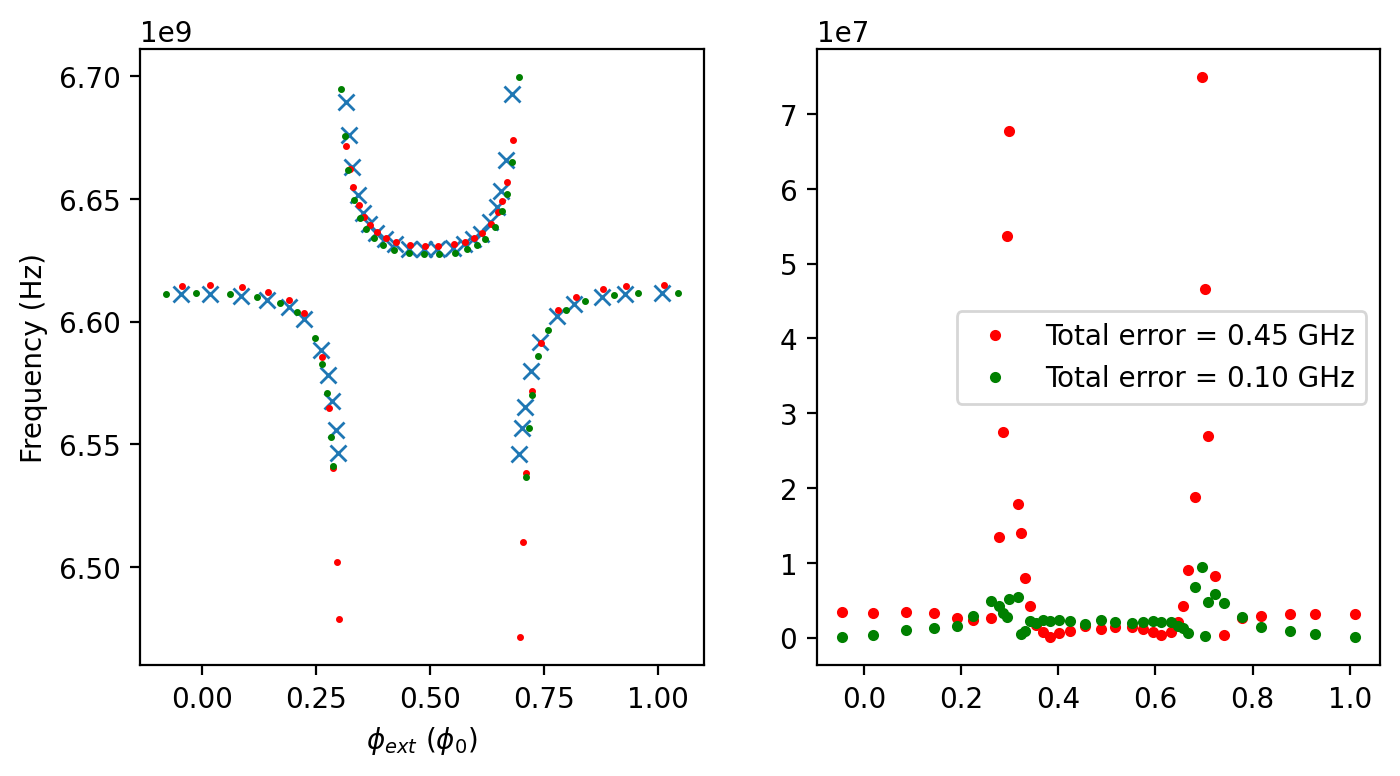

In [156]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

## Qubit 1 and Resonator 1 [Cooldown 1]

In [163]:
experiment_name = 'resonator_and_qubit_1_single_1'
load = False
method = 'Nelder-Mead'
method = 'SLSQP'


### Load spectral data and theoretical model

In [164]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [165]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [166]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9), 
          (2,25), (30,170), (0,2), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

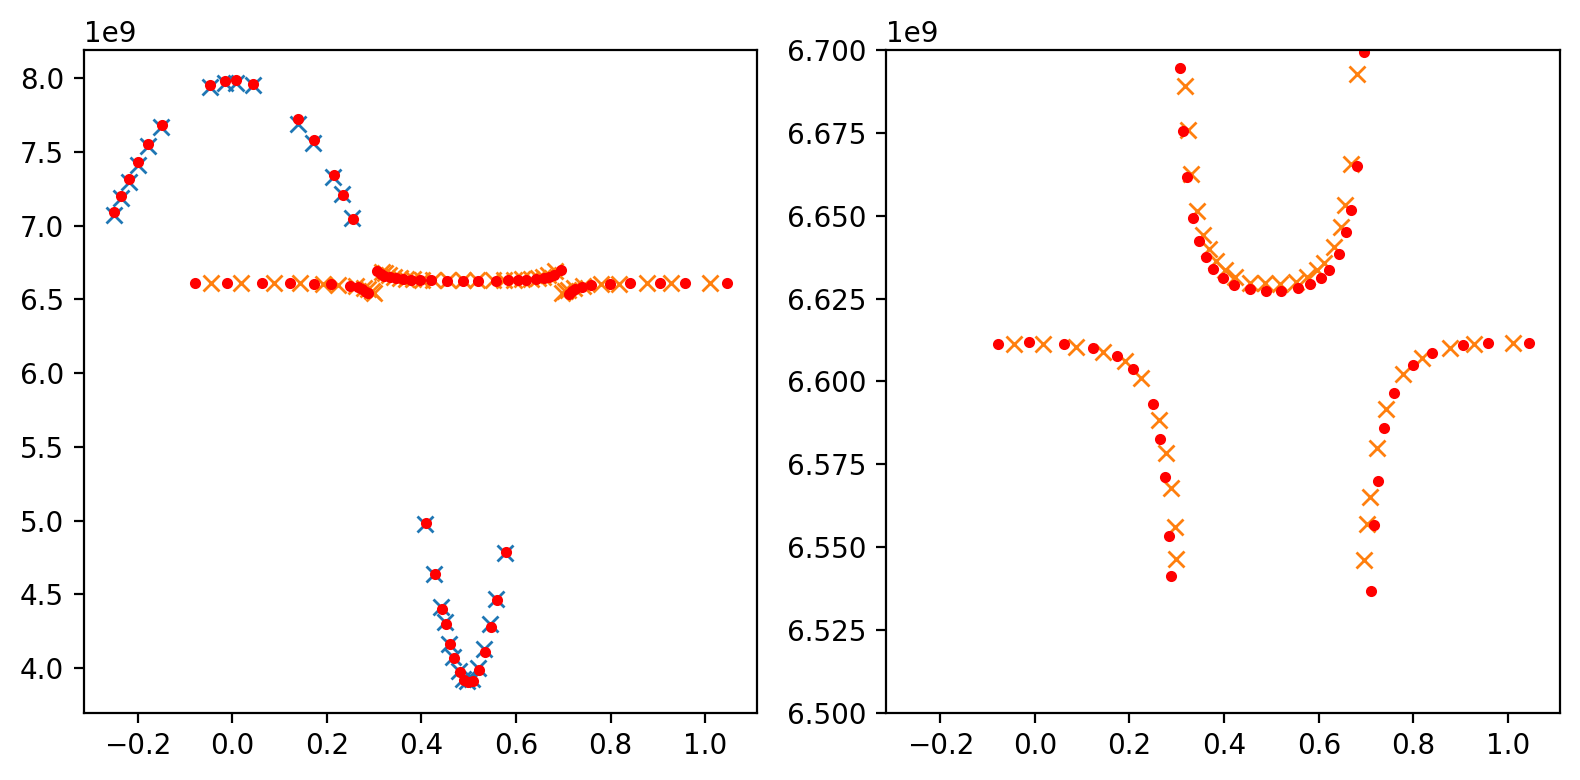

In [167]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
fig.tight_layout()

### Optimize or load previous optimization

In [168]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.006632918869510417
0.006632918355339253
0.006632918868126163
0.006632922311303593
0.006635177974959385
0.006629746134229926
0.006632918816509728
0.0066329188649838465
0.006632919091249044
0.006632918692617229
0.006632918275094365
13.220786260737299
0.03701653607966554
0.005344540537617857
0.005344540140516227
0.005344540534928245
0.0053445431920754955
0.005348221555598862
0.005350000631655557
0.00534454065725256
0.005344540544322548
0.005344540718000338
0.005345369432353618
0.0053460303882292065
15.764203922828287
0.0801803131663303
0.003175394962399982
0.003175394818621914
0.003175394971246555
0.003175395980455989
0.003171525078690108
0.003168755637351129
0.0031753952918447785
0.0031753949832477512
0.0031753950008321756
0.0031755637549734875
0.0031755301347431387
12.246680085466611
0.0639633061794893
0.002520351313514705
0.0025203511186434433
0.002520351171737747
0.0025203515073702284
0.0025205692423157914
0.002522152961437708
0.002520351699851213
0.002520351338191538
0.002520351315

In [169]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.377
LF_1 = 27.736
EJ_1 = 5.051
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 6.076
LR_1 = 95.100
Δ_1 = 0.986
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 24.389
LF_1 = 27.741
EJ_1 = 5.018
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 6.076
LR_1 = 95.100
Δ_1 = 0.993
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6550000000.0, 6650000000.0)

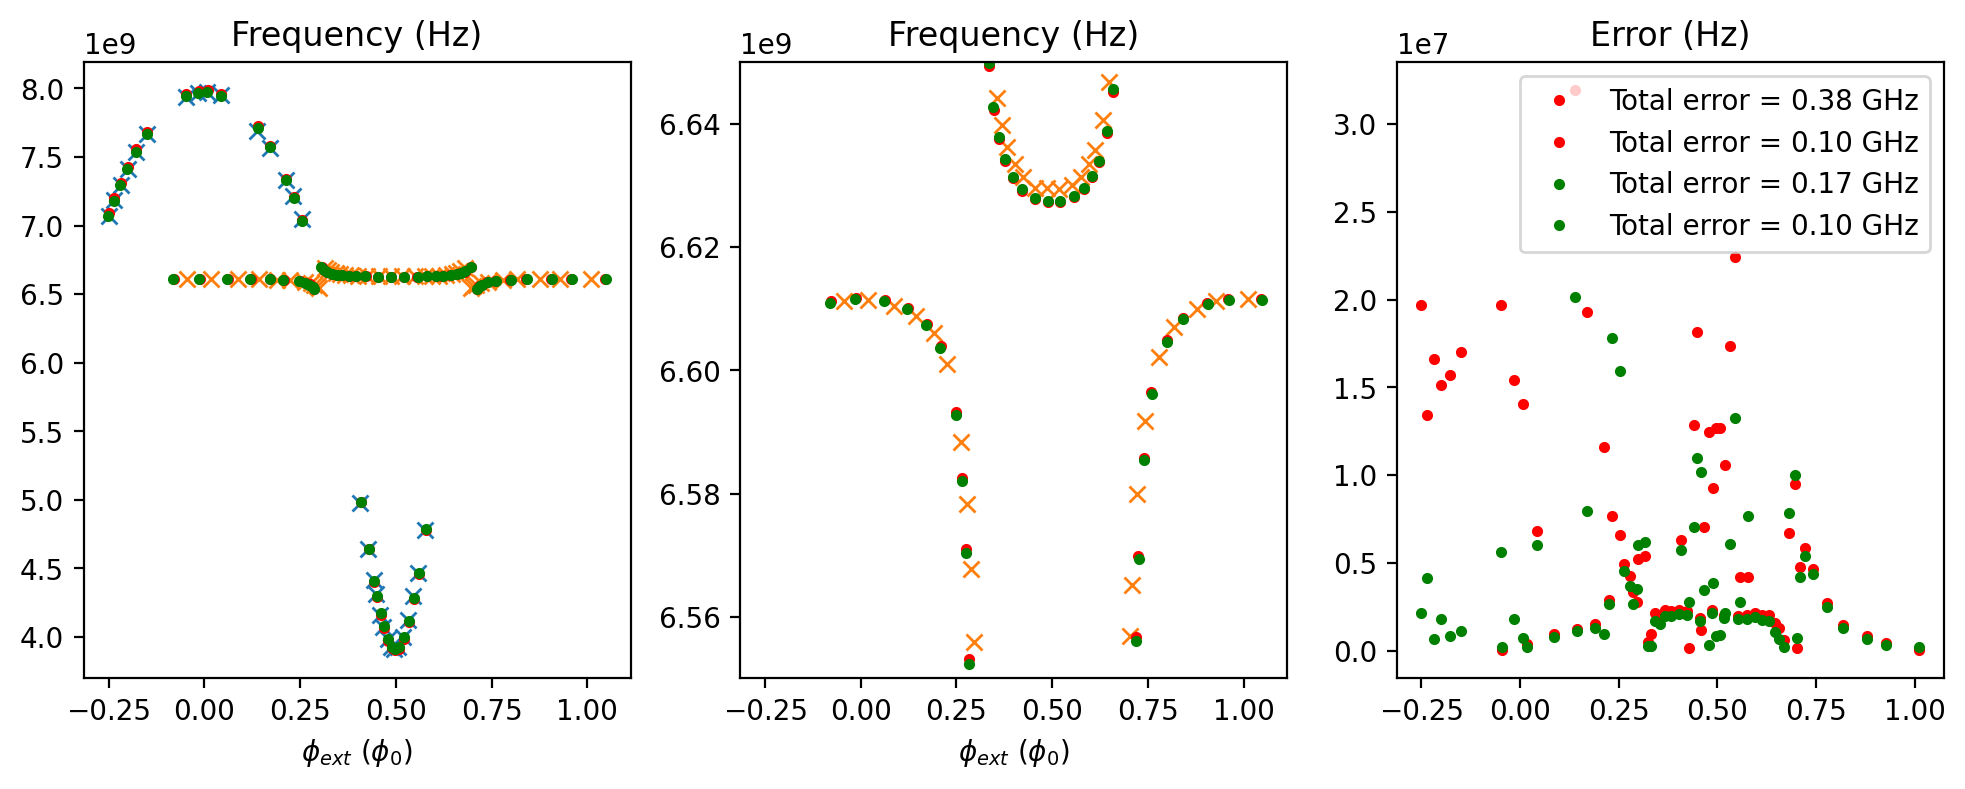

In [172]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.' , label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.' , label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [203]:
experiment_name = 'resonator_and_qubit_1_single_2'
method = 'Nelder-Mead'
# method = 'SLSQP'
load = False


### Load spectral data and theoretical model

In [204]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [205]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [215]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.8, I0_F_1*1.2), (I_origin_F_1*1.2, I_origin_F_1*0.8), 
          (2,25), (30,170), (0,2), (I0_R_1*0.8, I0_R_1*1.2), (I_origin_R_1*1.2, I_origin_R_1*0.8))

### Plot guess to check

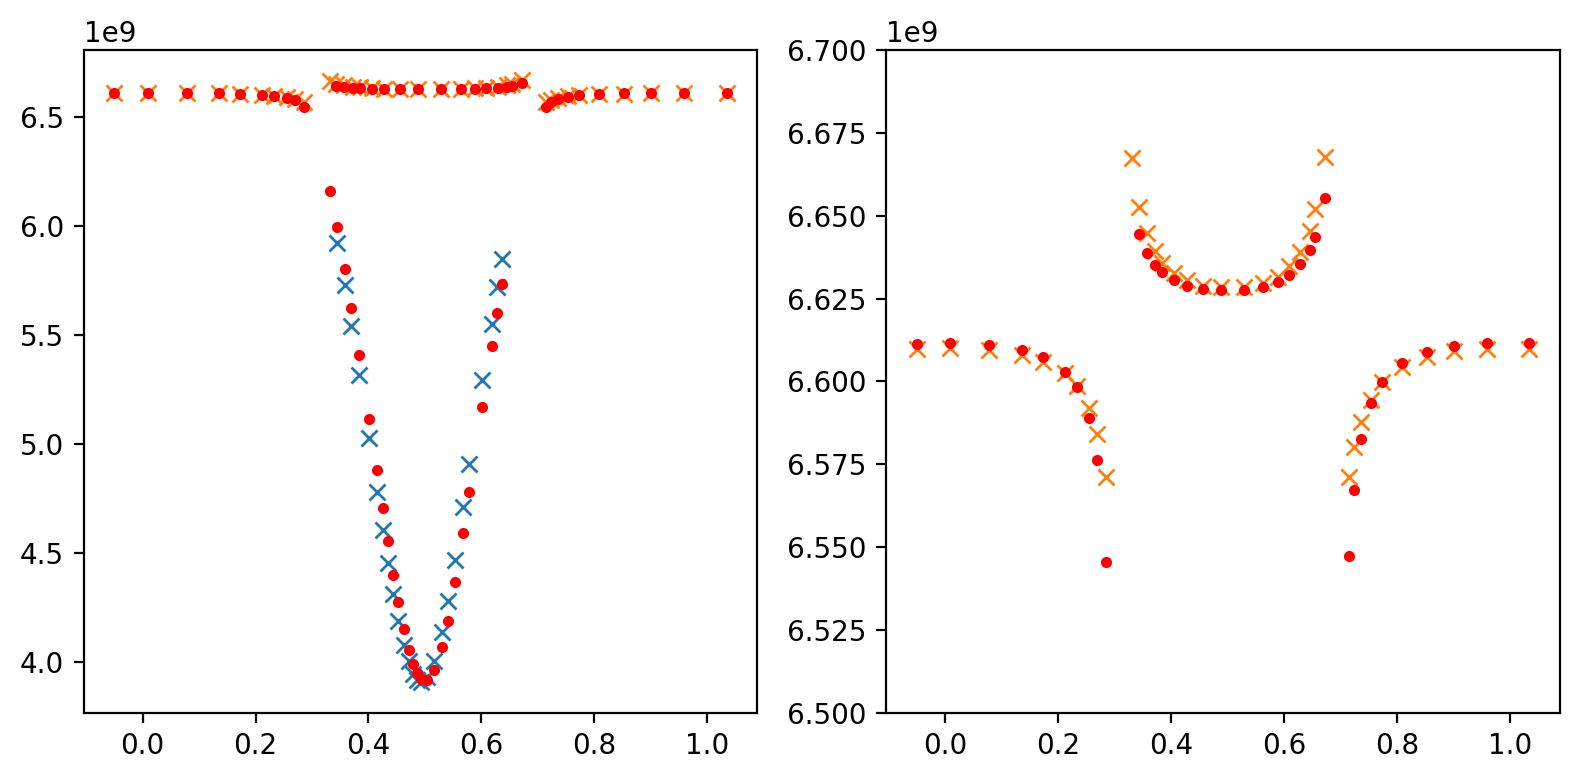

In [216]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [218]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.45564454884172667
0.45564454981366503
0.4556445493557445
0.4556445457613967
0.45574057428701364
0.4558369187442782
0.45564455031645357
0.4556445489326494
0.45564454948908384
0.4556319305421893
0.45560557368315685
74.25225563756331
74.25225562884071
74.25225564650965
74.25225576954426
74.25082558583235
74.2499360545486
74.25225548985513
74.25225562846083
74.25225561578742
74.25181779184695
74.25150577540764
0.22006371461587632
0.22006371550945297
0.22006371513028322
0.2200637122408461
0.2200806614765077
0.2200989833591151
0.22006371510910558
0.22006371464377752
0.22006371530200244
0.22005383363952397
0.220031448468997
0.19090456894824848
0.19090456972421144
0.19090456941001469
0.19090456711477438
0.19089313158745008
0.19088482529862033
0.19090456899214145
0.1909045689473497
0.1909045696604303
0.19089693942187705
0.19087732807103489
0.17610478126452286
0.1761047819592074
0.17610478166777704
0.17610477961920673
0.17608841868024794
0.17607623724524016
0.17610478110182334
0.17610478125025

In [219]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.389
LF_1 = 27.741
EJ_1 = 5.018
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 6.076
LR_1 = 95.100
Δ_1 = 0.993
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 24.345
LF_1 = 27.713
EJ_1 = 5.119
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 6.072
LR_1 = 95.100
Δ_1 = 0.960
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

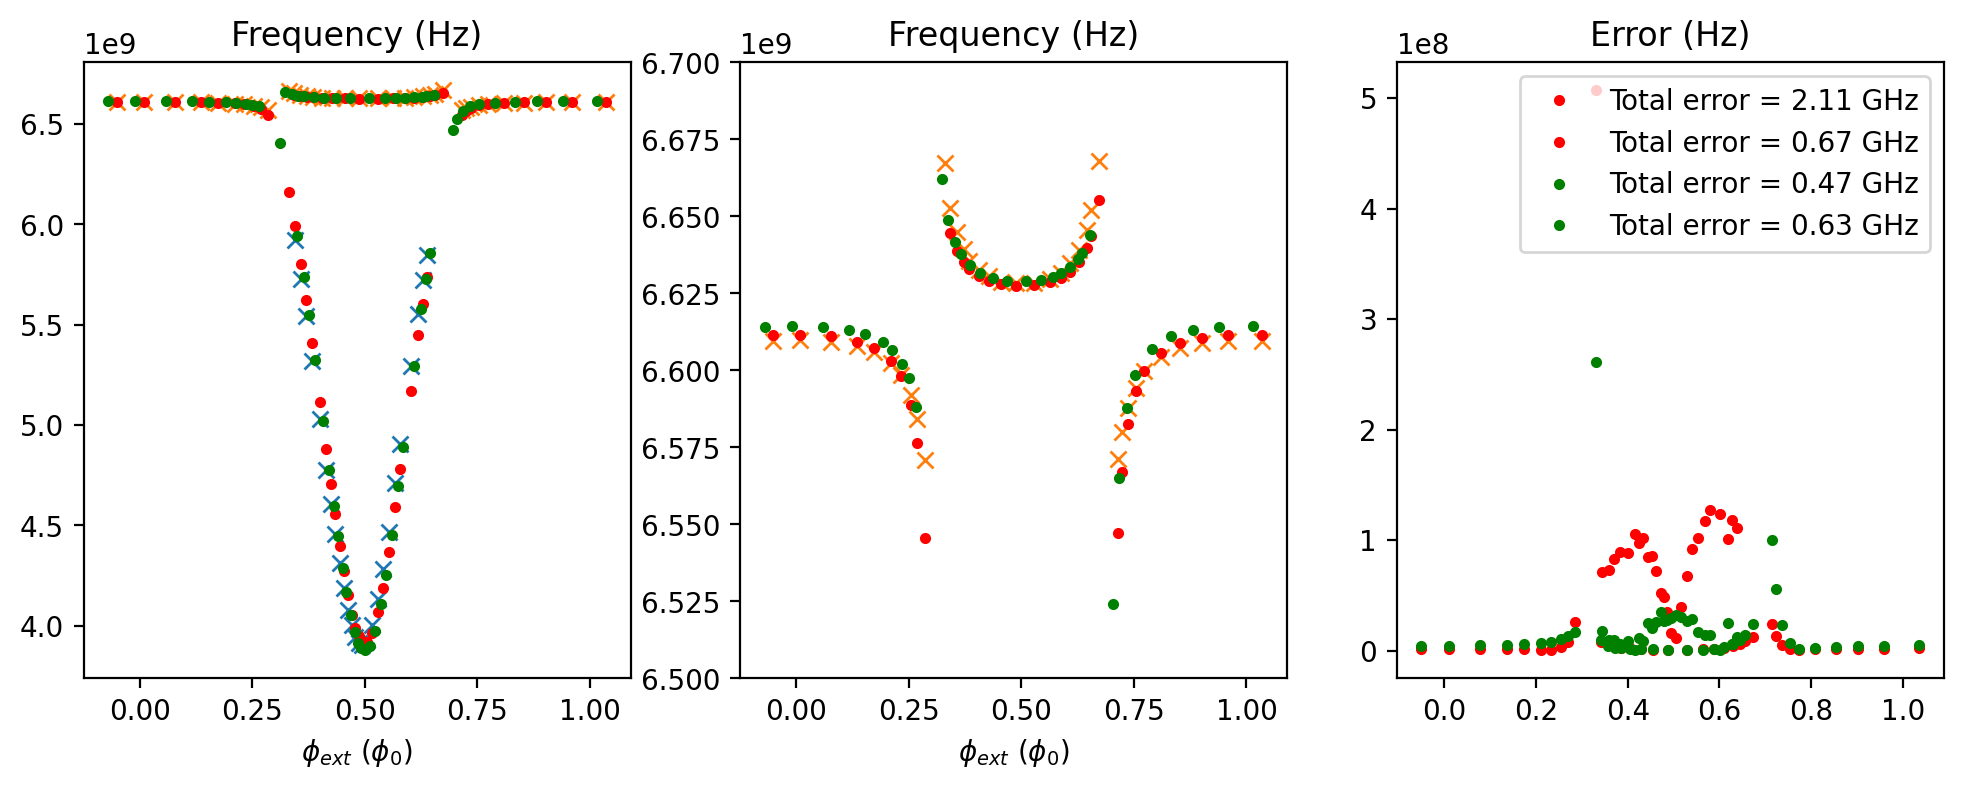

In [222]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [174]:
experiment_name = 'qubit_1'
load = False
method = 'Nelder-Mead'
method = 'SLSQP'


### Load spectral data and theoretical model

In [175]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [176]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [189]:
# CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

## Plot guess to check

(0.45, 0.55)

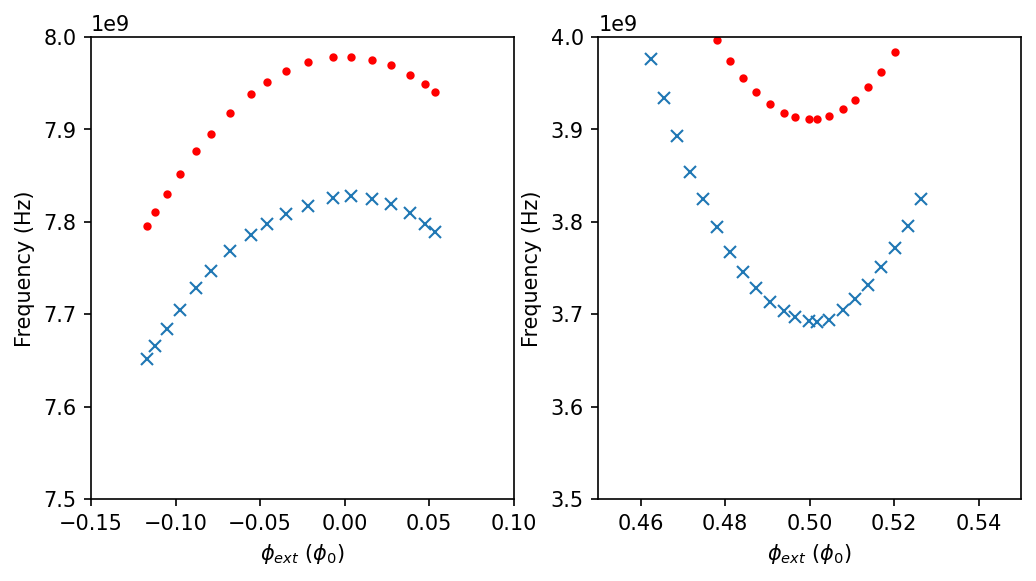

In [190]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_exp, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,8e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.5e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [191]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

1.3568370341515785
0.21685191720288388
0.03299291830529372
1.207110337242434
3.1975674837123997
2.664660038725673
2.465891254780085
0.16867153173687874
4.511026705178333
0.5763540448616367
0.2634102492518443
0.9183123486022221
0.2187475365390365
0.6045450521914248
0.1009586373380765
0.47152232056070875
0.05376232095027313
0.31531004873523877
0.0525399517146275
0.22997687606985803
0.05224845892033959
0.31200418213206893
0.028626152230249426
0.10975533079669264
0.024304170256981034
0.11688496196088188
0.011642102709986024
0.0770015848838392
0.014823203989417893
0.03738757647918585
0.01009687484214886
0.060563825392432206
0.0072200789339434005
0.05532444925984112
0.00660736278237872
0.022700340577473117
0.00847507508339072
0.019845957239650172
0.005745508274138136
0.010677929401210342
0.0047055346554396955
0.012808839646495599
0.0044730964823715205
0.008903767202721256
0.004220904610660175
0.01833355902137336
0.0030323050248622766
0.0026002006391276124
0.0058344484297504304
0.009822263619

In [192]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.377
LF_1 = 27.736
EJ_1 = 5.051
I0 = 0.003
I_origin = -0.002


Optimized parameters 

CF_1 = 27.289
LF_1 = 26.154
EJ_1 = 5.459
I0 = 0.003
I_origin = -0.002


## Plot fits and errors

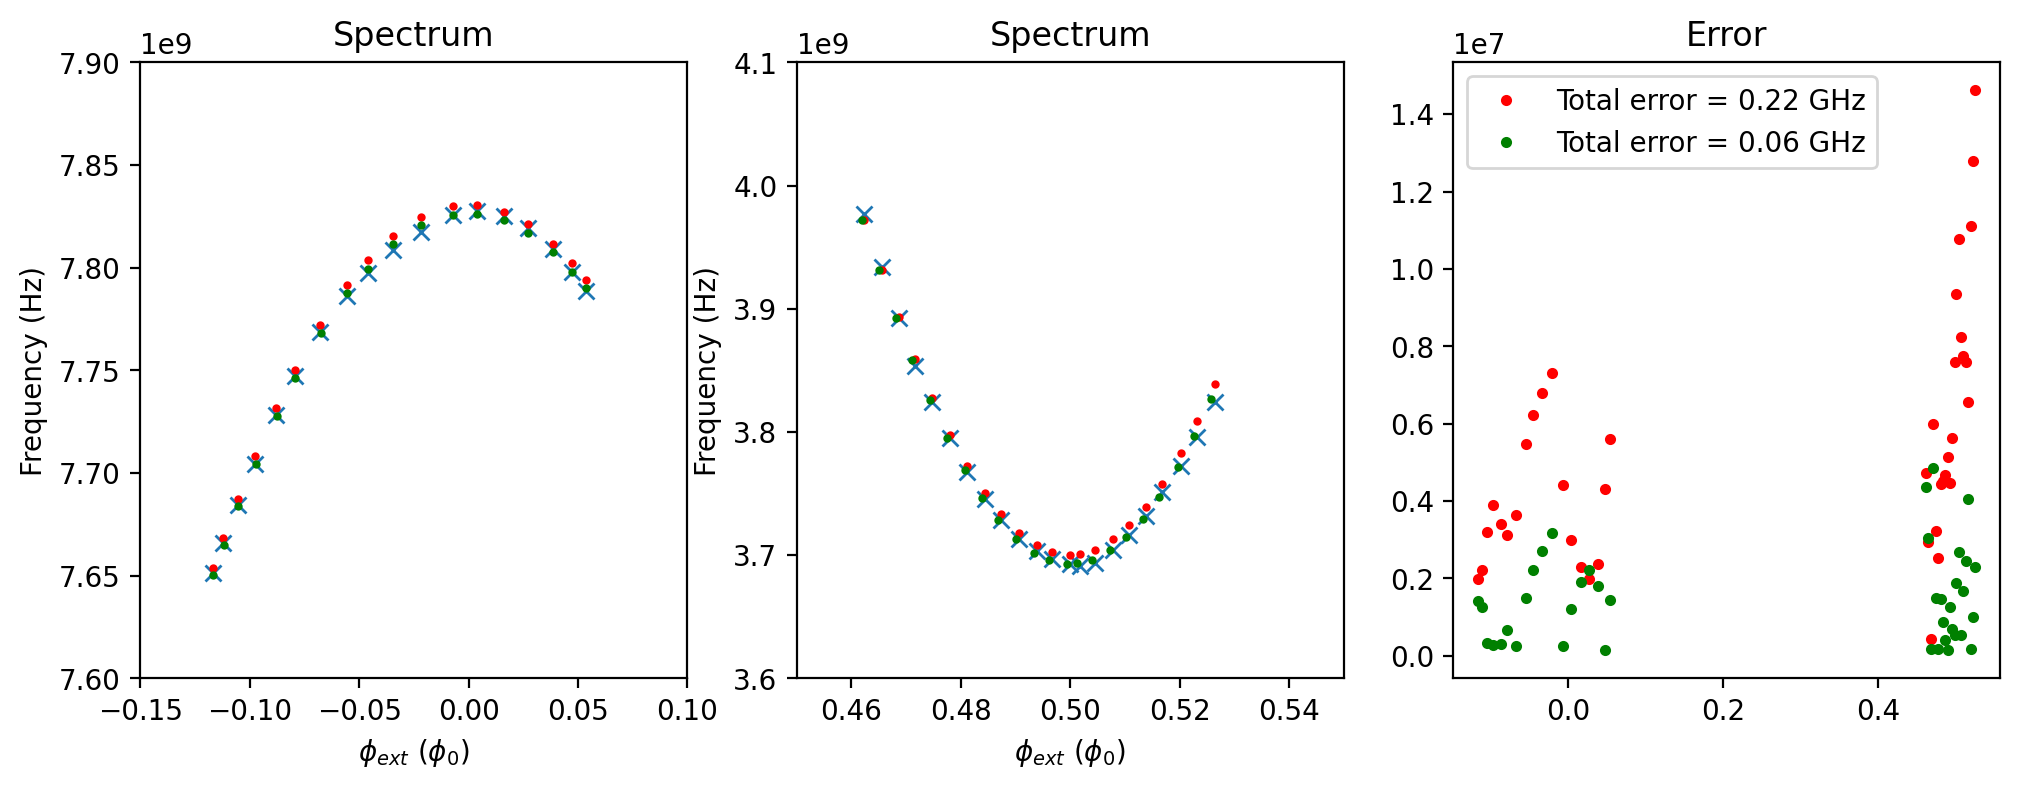

In [42]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.6e9, 7.9e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.6e9, 4.1e9])
ax2.set_xlim([0.45, 0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax3.legend()

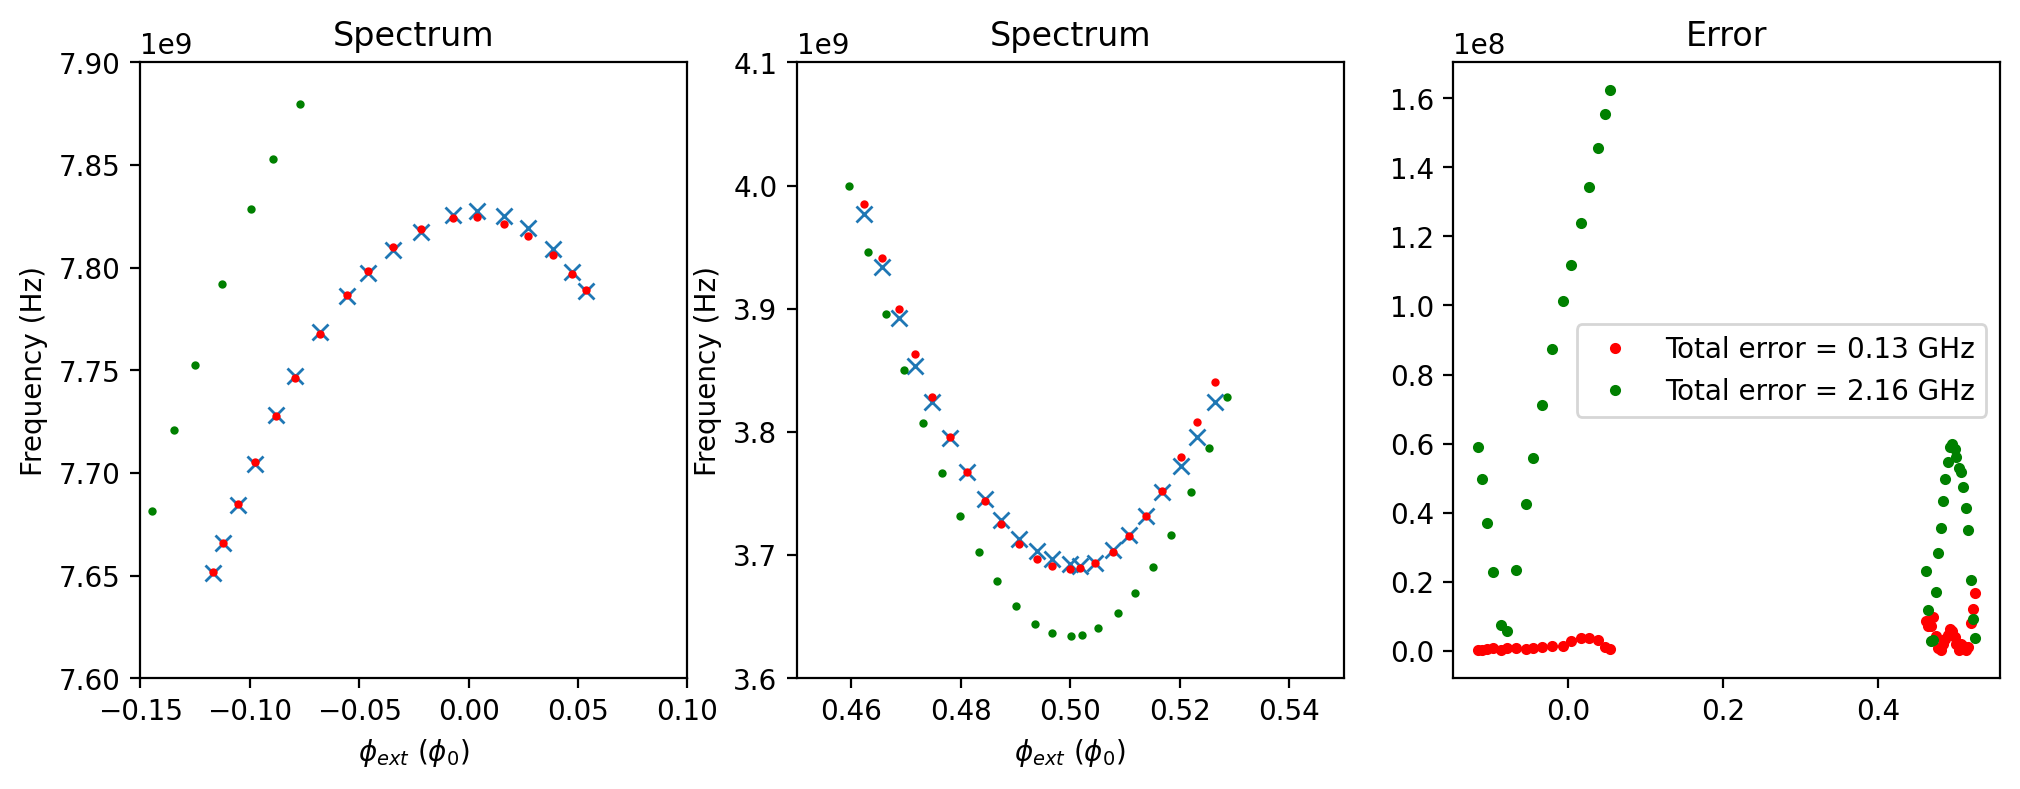

# Resonator 1 

In [236]:
experiment_name = 'resonator_1'
load = False
method = 'Nelder-Mead'

### Load data

In [237]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

## Define cost function

In [238]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [243]:
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
_, _, _, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

C_int = 500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 13
crossing_index_2  = 10
LR_1, CR_1 = sq_ext.ωR_to_LR_CR(6.495, LR=LR_1)

parameter_names = ['C_int', 'CR_1', 'LR_1', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int, CR_1, LR_1 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, Δ_1,  nmax_r, nmax_f ])
bounds= ((10,1000), (2,25),(30,170) ,(I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

## Plot guess to check

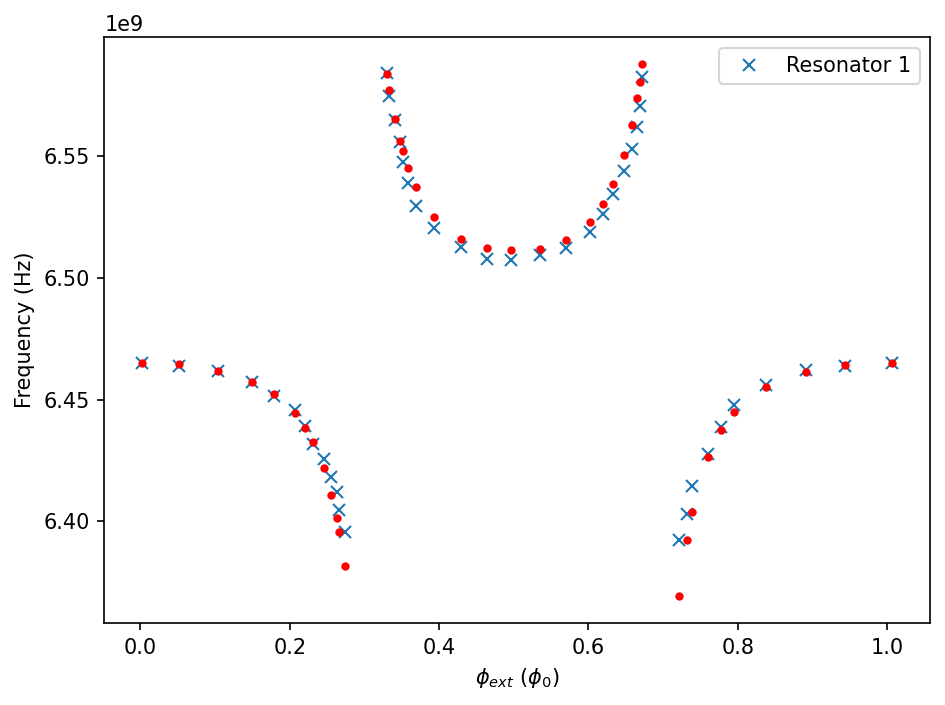

In [244]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [245]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.0019042185838564188
0.0011320547776047093
0.9101331712429959
0.910036371807491
0.08520658672794446
0.06113465450906451
0.37472773118954666
1.5015812372387545
0.18666616835361144
0.5493307552302162
0.06516434976329605
0.2806101641398403
0.04055603432211713
0.17244308057390179
0.012254549358024171
0.10648851544880251
0.012904312561115568
0.08134854821153024
0.012198991705271249
0.05601396622926158
0.010293538933698627
0.022540602381565956
0.0038120993443406183
0.019423838169299094
0.0038456937807178526
0.0123419121463032
0.004384513552413902
0.011817661004821112
0.003891898550940432
0.004372083097879569
0.002509471138678051
0.005570463021436782
0.002254320104086231
0.0023524545328781517
0.002111410601664767
0.002333199892160432
0.003909199033730888
0.0015008076258128664
0.0028003821307607526
0.0016021854554273862
0.0012083442434141745
0.003633771722218591
0.0013397504091249637
0.0009158934990824921
0.0010082828711813713
0.0008314419794223323
0.0009371490240835624
0.0006263356168388613


In [246]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int = 500.000
CR_1 = 6.314
LR_1 = 95.100
I0_guess = 0.003
I_origin_guess = -0.002


Optimized parameters 

C_int = 567.741
CR_1 = 6.372
LR_1 = 94.347
I0_guess = 0.003
I_origin_guess = -0.002


## Plot fits and errors

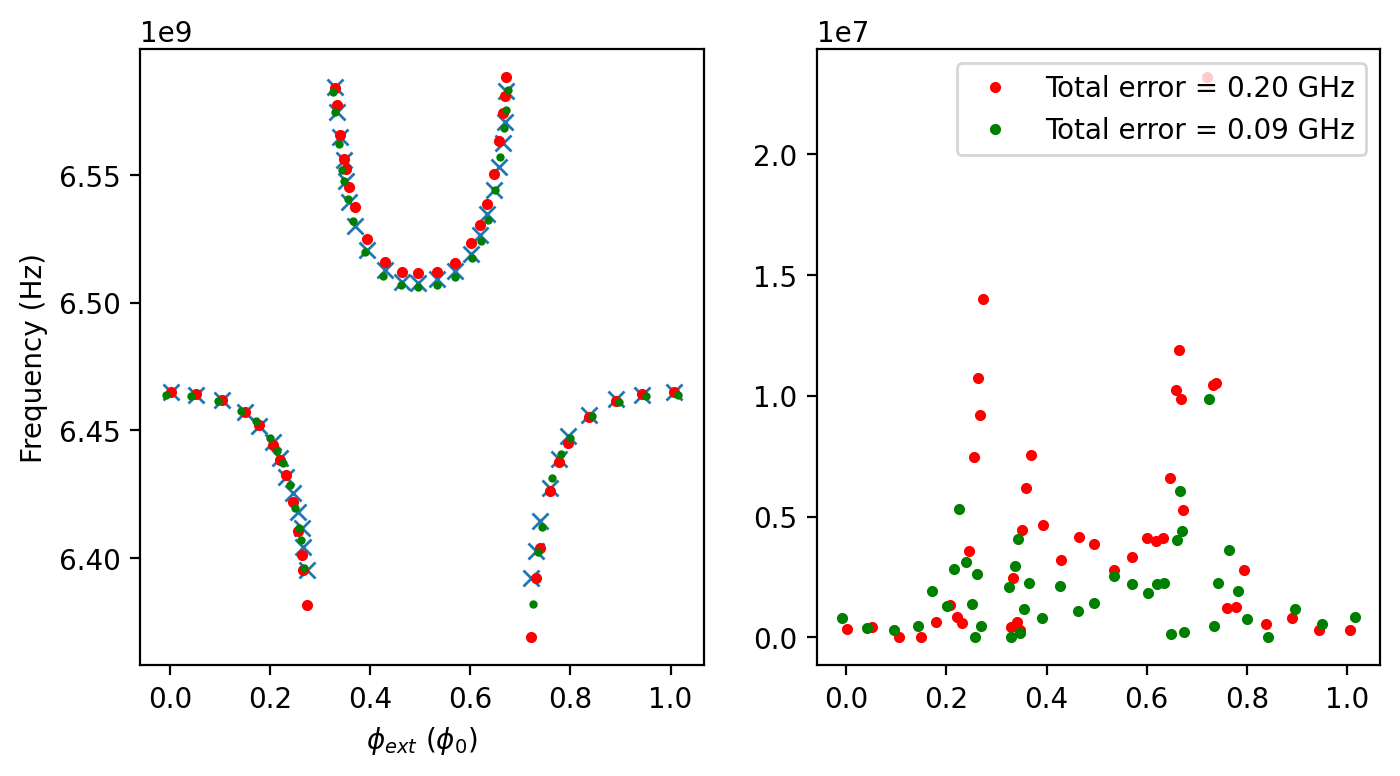

In [247]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

# Qubit 1 and Resonator 1

In [266]:
experiment_name = 'resonator_and_qubit_1'
load = False


### Load spectral data and theoretical model

In [267]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [268]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [269]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int, CR_1, LR_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_R = 13
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_1, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, C_int, CR_1, LR_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'C_int', 'CR_1', 'LR_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

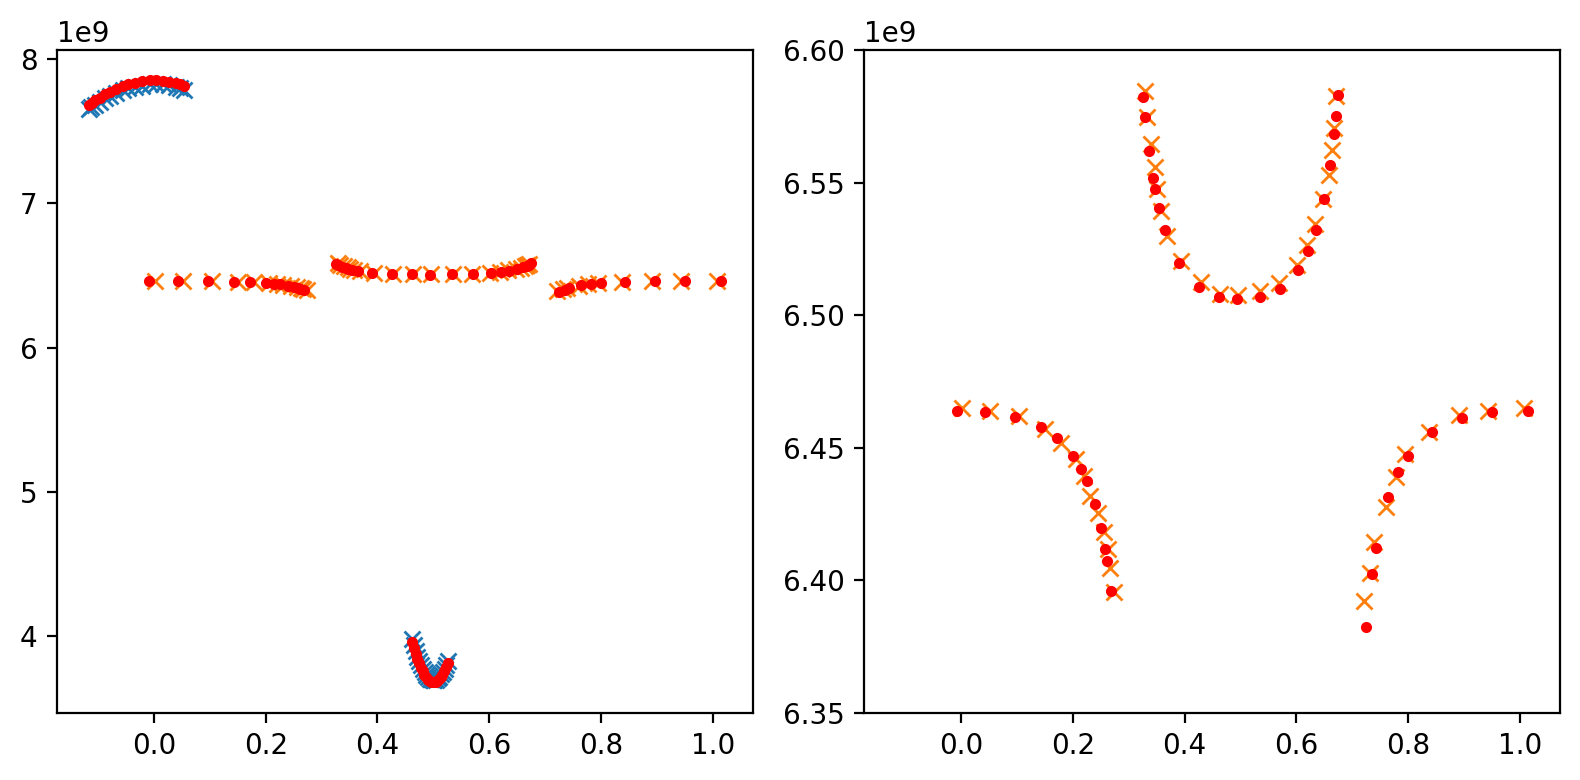

In [270]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.35e9,6.6e9])
fig.tight_layout()

### Optimize or load previous optimization

In [271]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.020599127115969822
0.7374737446321282
0.984603394725822
0.5888584335577625
0.8574720138383651
0.8063670774658604
0.01935190746809639
0.9358606056769402
0.9361827971649211
0.08335071922044138
0.06627117758353228
0.8249546439892325
0.5894641446789929
1.2124229035678429
0.2518559118570839
1.3256644807993712
0.1531167838963247
1.2289129791425444
0.17449708477973025
1.0888258022375255
0.21614421676821213
1.250390014796673
0.18170332685085955
0.7076583161942435
0.15231596686993473
0.24906975496616846
0.2281623695114455
0.5953002766152325
0.03555590598008777
0.2585437075515357
0.06248748165109531
0.28041793113984276
0.0680284075591352
0.3325554522173893
0.042266874373423406
0.20133573008888023
0.04934234300910308
0.20124397729225846
0.04333953812874944
0.08740285638438515
0.023183179393745992
0.09917292207448833
0.02334207637832475
0.05693302711316515
0.06825741251647759
0.01921662436032434
0.09580576053663811
0.01711776700782902
0.06287027212875544
0.017272010368867836
0.029301274126085297

In [261]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.020599127115950543
0.7374737446321572
0.9846033947257918
0.5888584335578151
0.8574720138384017
0.8063670774658519
0.01935190746809928
0.9358606056769526
0.9361827971648485
0.023575699587910143
0.0833507192203979
0.06627117758352652
0.8314916469089242
0.6358448280217825
1.2258146211476755
0.2492556840039515
1.2860902589224164
0.15653933131459521
1.188399628636285
0.1775579524206618
1.0946567479200182
0.2161593137830971
1.2458717580250624
0.18010621103361152
0.7269869210955408
0.16353921119701298
0.25151860595770525
0.03833280392202412
0.25139880368790685
0.07628124833450031
0.27460966859183134
0.06949186561979112
0.32879437484821555
0.04321941802116602
0.1612308086974544
0.1476764051275459
0.22118738378125546
0.04660791978917911
0.19453736628431603
0.04412071081621364
0.14687126594362862
0.04555538914341306
0.10690236653235184
0.02633398890688294
0.06708813186477183
0.052499247403818415
0.06706040314729277
0.024959957665301916
0.07073275157213298
0.021733493023685865
0.070386475976344

In [272]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 27.289
LF_1 = 26.154
EJ_1 = 5.459
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 567.741
CR_1 = 6.372
LR_1 = 94.347
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 28.694
LF_1 = 24.894
EJ_1 = 5.603
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 630.793
CR_1 = 6.478
LR_1 = 92.807
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6350000000.0, 6600000000.0)

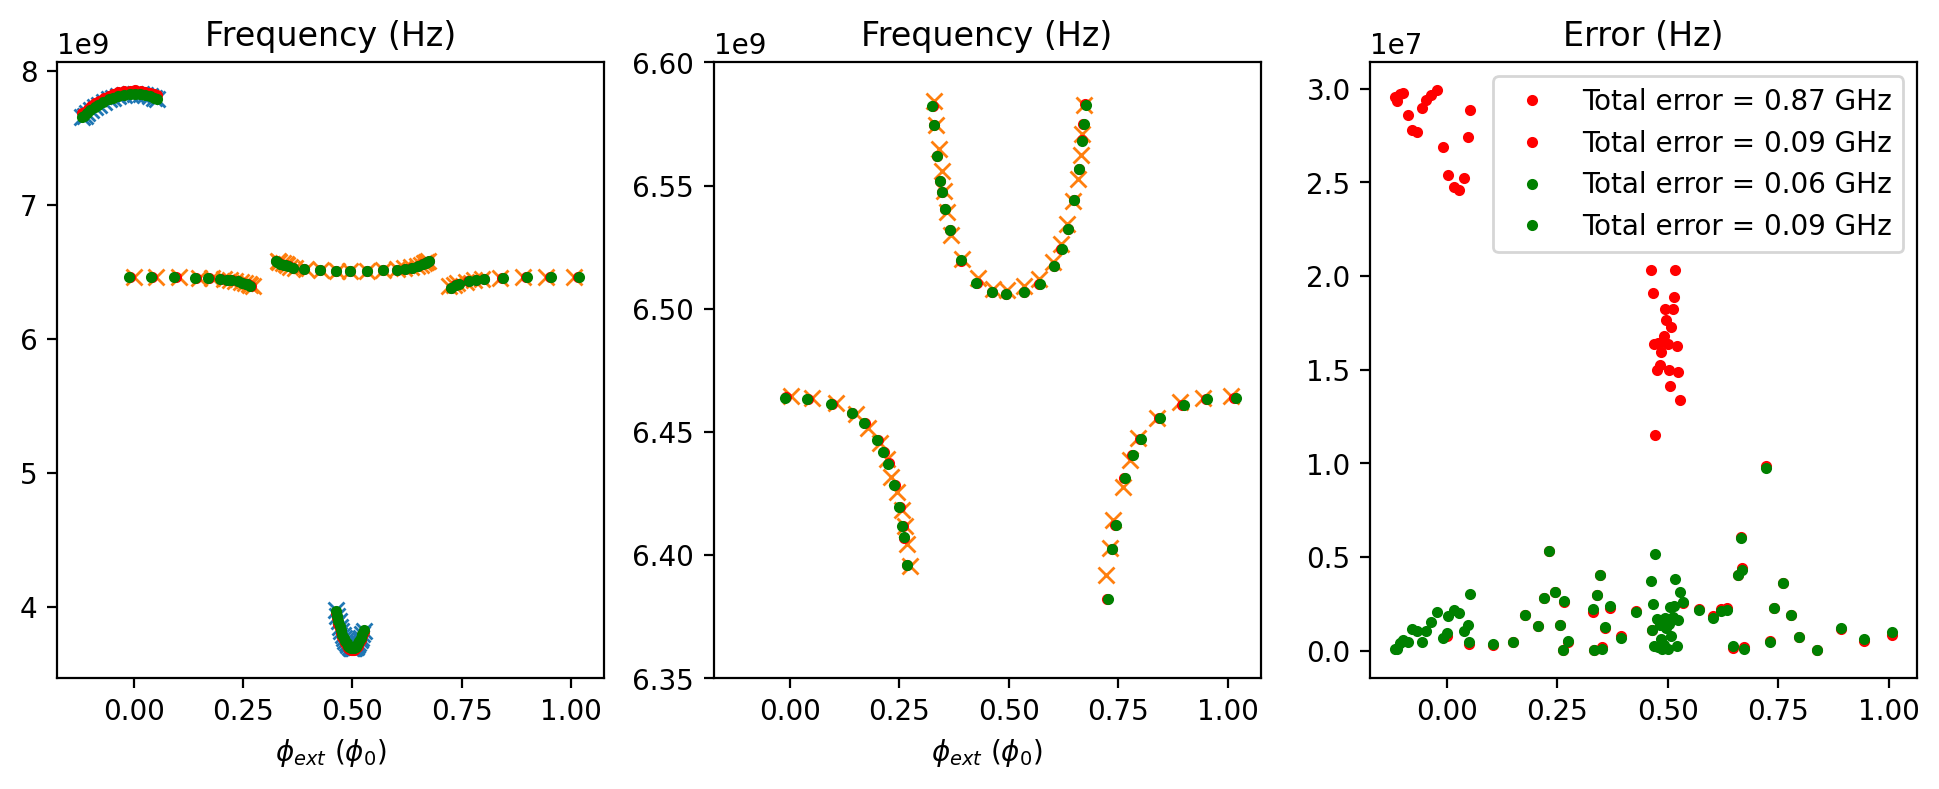

In [277]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


(6350000000.0, 6600000000.0)

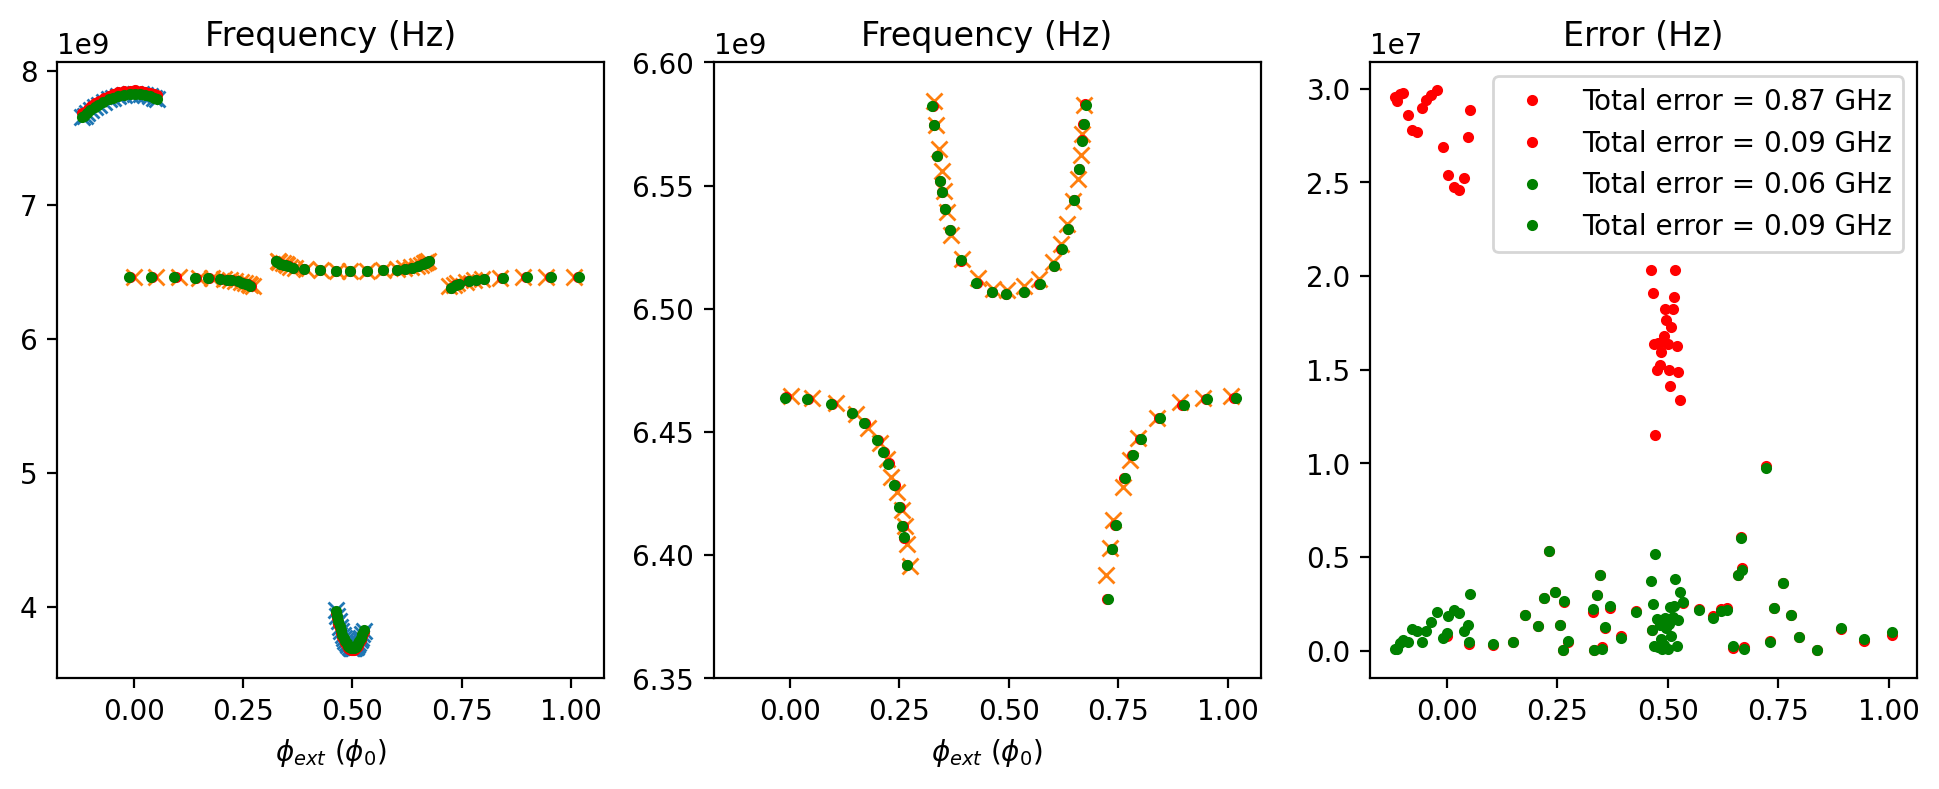

In [278]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


# Qubit 2

In [298]:
experiment_name = 'qubit_2'
load = False
method = 'Nelder-Mead'
method = 'SLSQP'


### Load spectral data and theoretical model

In [299]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [300]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [304]:
CR_2, CF_2, LF_2, LR_2, EJ_2, Δ_2, ω_r_2 = sq_ext.get_experimental_parameters('qubit 2', Δ=0.1, LR=100)
# CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_2, LF_2, EJ_2, I0_guess, I_origin_guess]

parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

## Plot guess to check

(0.45, 0.55)

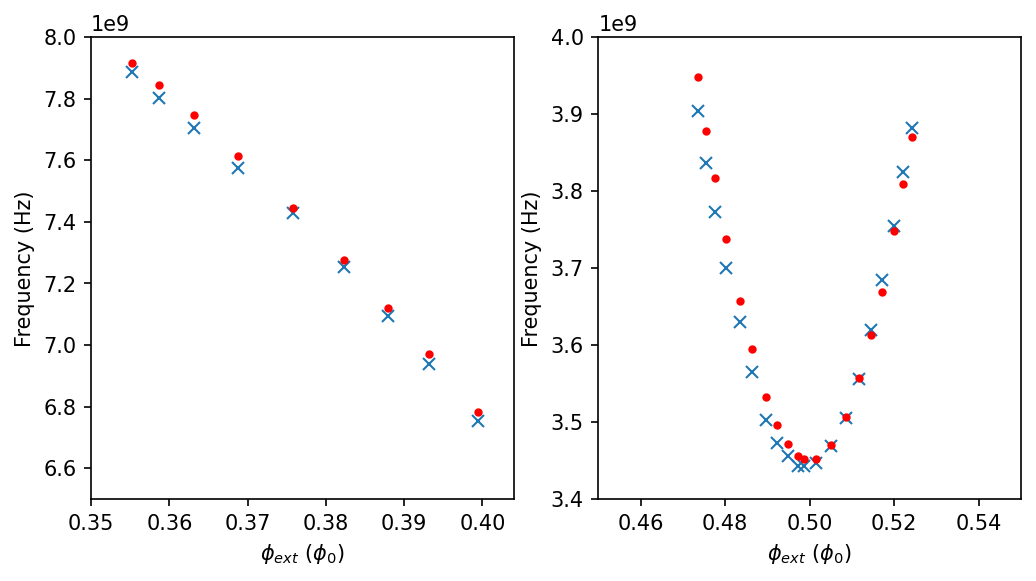

In [313]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_exp, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [306]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.02062932333148802
0.0206293213222601
0.02062932090645514
0.020629323004703205
0.02067303221526006
0.02072914067425818
533.1976167715512
3.0646259605244692
0.007666101064632242
0.007666100397746719
0.007666099438755489
0.007666098108775294
0.007645272984771377
0.007624460940053183
56.96810558760359
2.36059060760867
0.015859293561399427
0.004144409719566266
0.004144410010889563
0.004144410001418
0.00414440951011935
0.004125227010686432
0.004103883832050149
0.64864082854915
0.009046878736444762
0.003883794575443443
0.0038837949726706097
0.0038837948170454568
0.0038837937979462494
0.0038652780814987632
0.003843102759206185
0.2417393209792202
0.001113683021584904
0.001113683008493856
0.0011136829663325784
0.0011136828860981282
0.0011131590374162403
0.0011126113445757305
0.010672606239182796
0.001193125486564527
0.0011222880622466127
0.001115205362754084
0.0011139896568346387
0.0011137427750676446
0.0011136914971530615
0.0011136821032399677
0.0011136812851449095
0.0011136818311836306
0.001

In [307]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 22.400
LF_1 = 20.400
EJ_1 = 9.500
I0 = 0.005
I_origin = -0.005


Optimized parameters 

CF_1 = 22.526
LF_1 = 20.481
EJ_1 = 9.453
I0 = 0.005
I_origin = -0.005


## Plot fits and errors

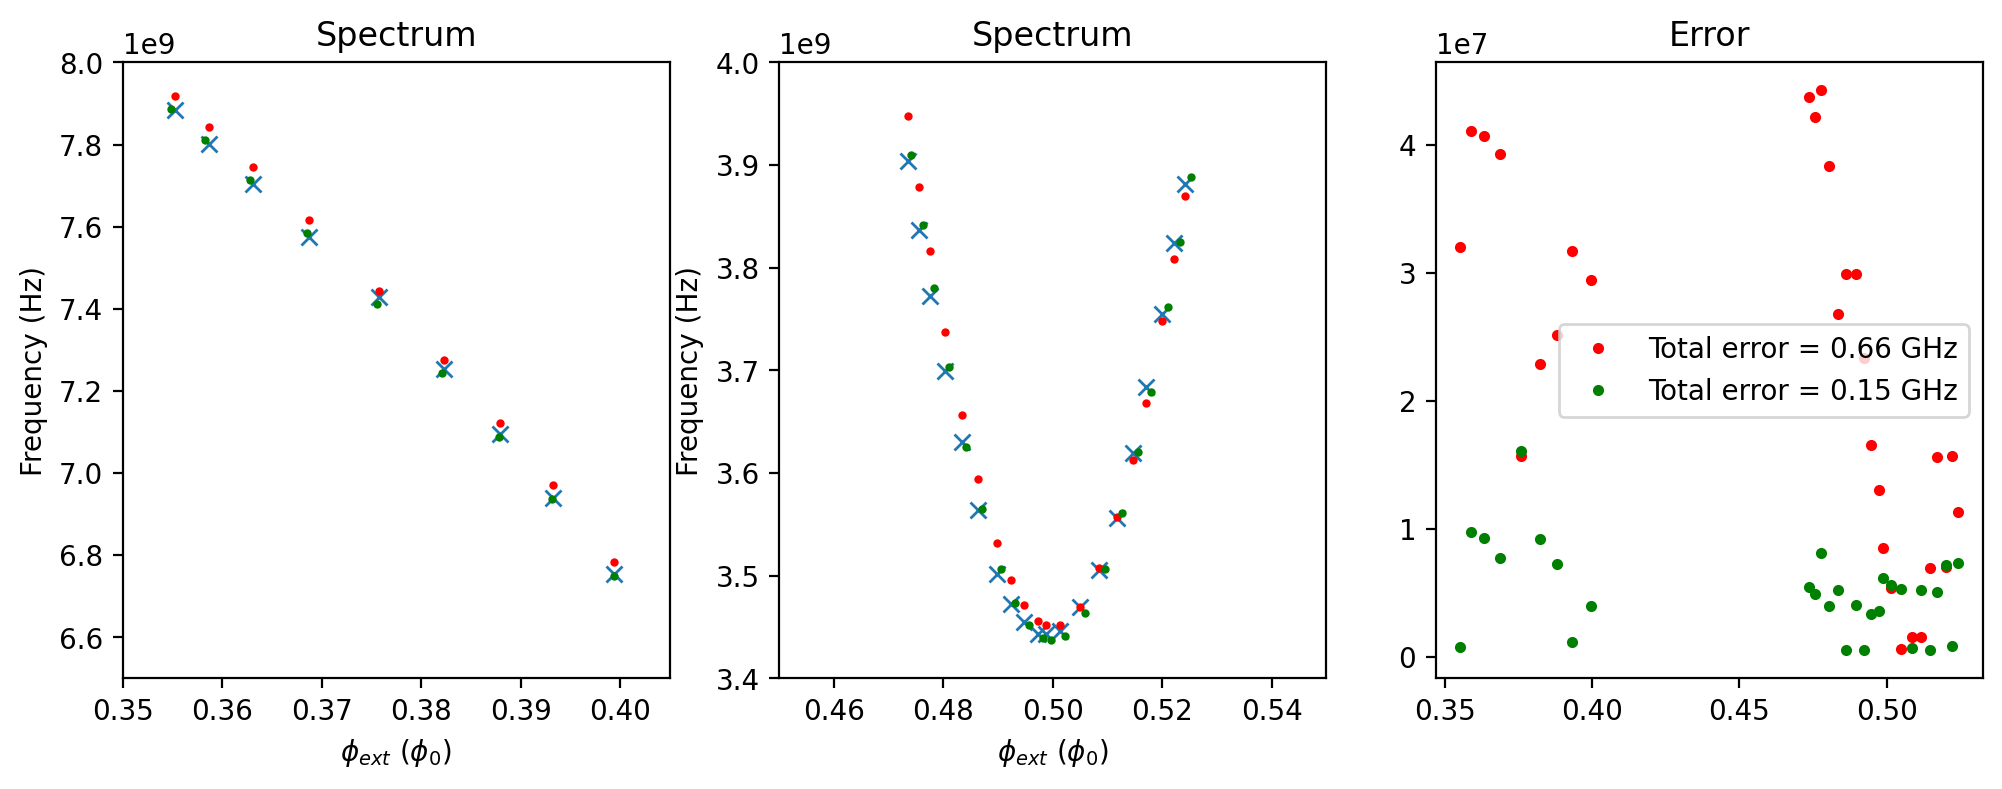

In [314]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax3.legend()

# Resonator 2

In [326]:
experiment_name = 'resonator_2'
load = False
method = 'Nelder-Mead'

### Load data

In [327]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

## Define cost function

In [328]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [381]:
CR_2, CF_2, LF_2, LR_2, EJ_2, Δ_2, ω_r_2 = sq_ext.get_experimental_parameters('qubit 2', Δ=0.1, LR=100)

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 11
crossing_index_2  = 9
LR_2, CR_2 = sq_ext.ωR_to_LR_CR(6.2745, LR=LR_2)
Δ_2+=0.1

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_2, LF_2, EJ_2, nmax_r, nmax_f ])
parameters_guess = [CR_2, LR_2, Δ_2, I0_guess, I_origin_guess]
parameter_names = ['CR_2', 'LR_2', 'Delta', 'I0', 'I_origin']
bounds = ((2,25), (30,170), (0,2), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*0.9, I_origin_guess*1.1))

## Plot guess to check

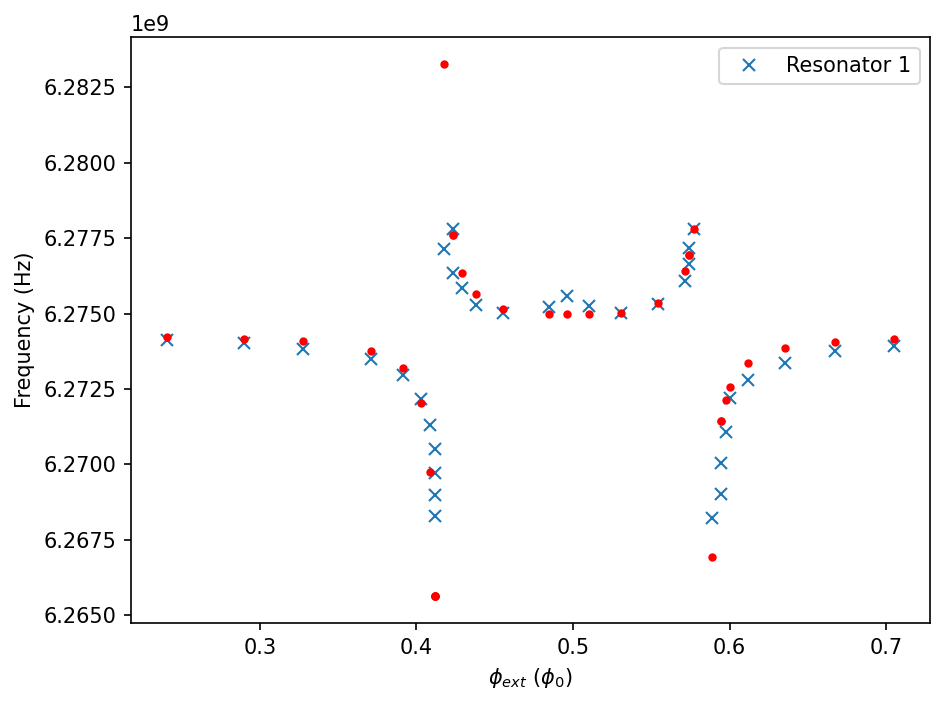

In [382]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

# ax.set_ylim([6.26e9, 6.28e9])
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [383]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.00011386476802731288
0.7751274774508313
0.775237170738542
0.00015538069286702953
3.2237007559520285
0.00027656561082236805
4.116225163352438
0.35413944486087057
0.2629761264484623
1.0763451525112437
0.1734097092944581
0.15356473888438954
0.3323564670291086
0.05085695820052262
0.3297130603645023
0.02858279083122095
0.20474895541369242
0.01391688149565936
0.0597527198839331
0.011144613072813038
0.06400519109676929
0.0042323970521510905
0.01988622324060838
0.00333736242320516
0.011201545948680624
0.002735698980026182
0.011774265418193321
0.0005861522390116963
0.0026663329127204535
0.005726805821467465
0.0004827596882626809
0.002084729031141874
0.000590979903147278
0.00071450013595711
0.00022822172344138402
0.0013066378881073282
0.0001806020761023582
0.00041506955215180654
0.00018635272333303107
0.0005386706256172772
0.00013759217368991574
0.00041064808043287716
0.00013146355167106824
0.00016123741031409265
0.0002596037339728774
0.00012887092654197057
0.00015763327385760032
0.00012903747

In [384]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CR_2 = 6.434
LR_2 = 100.000
Delta = 0.200
I0 = 0.005
I_origin = 0.000


Optimized parameters 

CR_2 = 6.377
LR_2 = 100.906
Delta = 0.156
I0 = 0.005
I_origin = 0.000


## Plot fits and errors

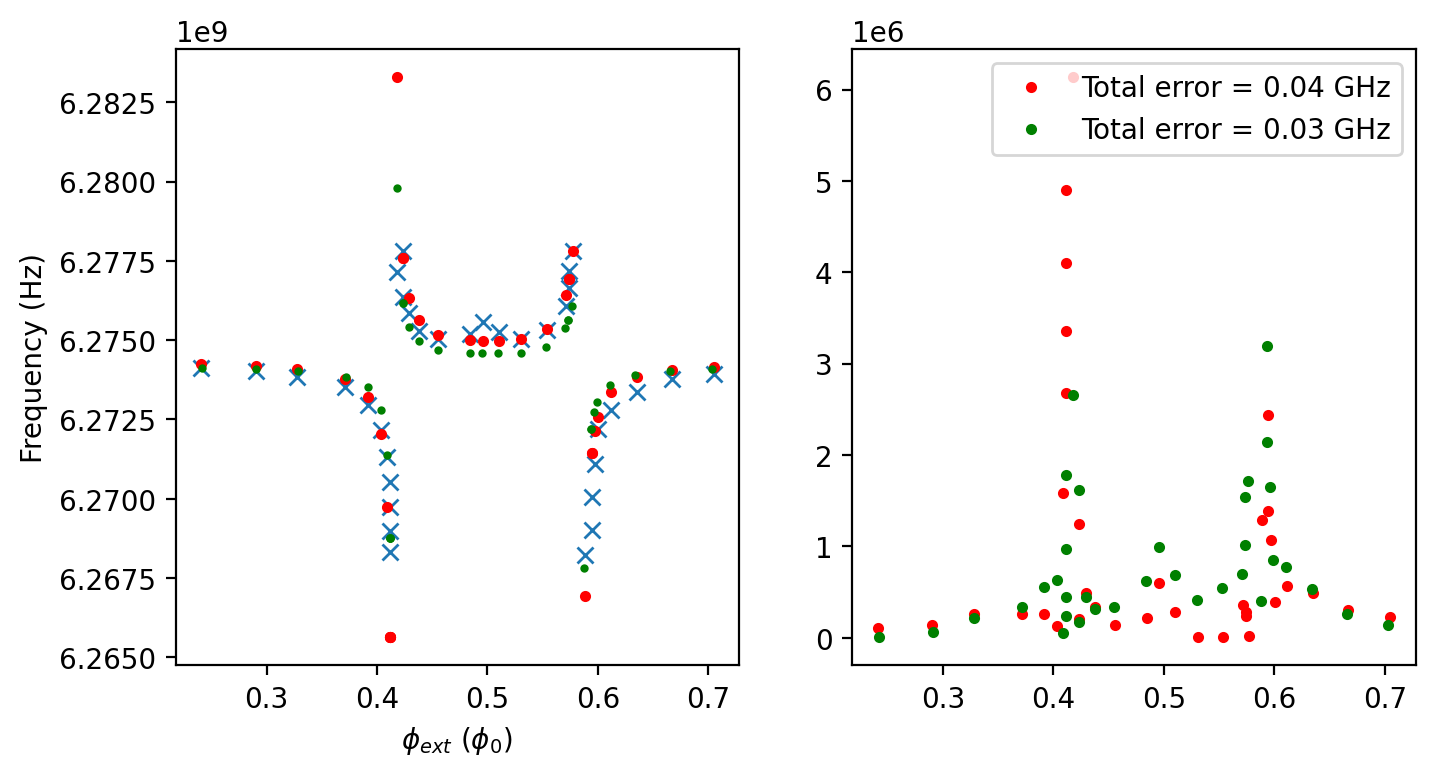

In [385]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()